<a href="https://colab.research.google.com/github/RubenQuispe/Hackathon-BBVA/blob/master/ElVueloDeDumbo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EL VUELO DE DUMBO
# Mg. Rubén Quispe





# LINK DEL PROTOTIPO

https://drive.google.com/file/d/1uRe7ZJ-hZ0ygrkaZx2vVXlcq1Ypi8-5X/view?usp=sharing

# CODIGO PARA IMPLEMENTACION DE INTELIGENCIA ARTIFICIAL

In [ ]:
# Librerias a implementar

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#X = pd.read_csv('german_credit_data.csv')
#X.head()

In [ ]:
# Leyendo dataset
X = pd.read_csv('Cust_Segmentation_IBM.csv')
X.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
# Funciones para EDA
def eda(data):
    print("----------Data Top-5-----------")
    print(data.head(5))
    print("-----------Informacion-----------")
    print(data.info())
    print("-----------Data Types-----------")
    print(data.dtypes)
    print("----------Missing value-----------")
    print(data.isnull().sum())
    print("----------Null value-----------")
    print(data.isna().sum())
    print("----------Diomension de la Data----------")
    print(data.shape)

def graph_insight(data):
    print(set(data.dtypes.tolist()))
    df_num = data.select_dtypes(include = ['float64', 'int64'])
    df_num.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8);
    
def drop_duplicate(data, subset):
    print('Before drop shape:', data.shape)
    before = data.shape[0]
    data.drop_duplicates(subset,keep='first', inplace=True) #subset is list where you have to put all column for duplicate check
    data.reset_index(drop=True, inplace=True)
    print('After drop shape:', data.shape)
    after = data.shape[0]
    print('Total Duplicate:', before-after)

In [ ]:
eda(X)

----------Data Top-5-----------
   Customer Id  Age  Edu  ...  Defaulted  Address  DebtIncomeRatio
0            1   41    2  ...        0.0   NBA001              6.3
1            2   47    1  ...        0.0   NBA021             12.8
2            3   33    2  ...        1.0   NBA013             20.9
3            4   29    2  ...        0.0   NBA009              6.3
4            5   47    1  ...        0.0   NBA008              7.2

[5 rows x 10 columns]
-----------Informacion-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null  

In [ ]:
# nombres de categorical variable en un dataframe
object_cols = []
for col in X.columns:
  if X[col].dtypes == 'object':
    object_cols.append(col)
print(object_cols)

['Address']


In [ ]:
# Obtenemos el numero de entradas unicas de cada columna con variable categórica
for col in object_cols:
  n = X[col].nunique()
  d = [col, n]
  print(d)

['Address', 32]


In [ ]:
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = []
for col in object_cols:
  if X[col].nunique() < 10:
    low_cardinality_cols.append(col)
print('columnas con variable categoricas menor a 100: ', low_cardinality_cols)

#select numeric columns
numeric_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
print('columnas con  numeros enteros o reales: ', numeric_cols)

columnas con variable categoricas menor a 100:  []
columnas con  numeros enteros o reales:  ['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']


In [ ]:
#juntamos columnas 
my_cols = numeric_cols + low_cardinality_cols
X_train = X[my_cols].copy()

In [ ]:
#comprobamos si existen valores nan con la data train test y test
#en nuestro caso existe en la data valid y test
# nombres de columnas con NaN
def missingcol(X):
  missing_cols = []
  for col in X.columns:
    if X[col].isnull().sum() > 0:
      missing_cols.append(col)
  print(missing_cols)

In [ ]:
missingcol(X_train)

['Defaulted']


In [ ]:
X_train.shape

(850, 9)

In [ ]:
X_train = X_train.dropna()

In [ ]:
missingcol(X_train)

[]


In [ ]:
X_train.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
X_train.drop(['Customer Id'], axis=1, inplace=True)

In [ ]:
X_train.shape

(700, 8)

In [ ]:
#IMportando librerias para clusterizacion
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics.cluster import homogeneity_score
from sklearn import metrics

X = X_train.copy()
X.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
#convirtiendo yes/no a 1/0 las variables categoricas
#number = LabelEncoder()
#X['Sex'] = number.fit_transform(X['Sex'])

In [ ]:
# One-hot encode the data (to shorten the code, we use pandas)
X = pd.get_dummies(X)
print(X.shape)

(700, 8)


In [ ]:
X.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
X.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [ ]:
# Escalando los datos para llevar todos los atributos a un nivel comparable
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizando los datos para que los datos sigan aproximadamente una distribución gaussiana 
X_normalized = normalize(X_scaled) 
  
# Convirtiendo numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# transformando la dimensionaliadd del sistema
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

         P1        P2
0 -0.316202 -0.366257
1  0.998402 -0.320470
2  0.711332  0.757767
3 -0.779339 -0.025339
4  0.903224 -0.242787


In [ ]:
# Numpy array de todos los labels clusterizados asignadas a cada punto de datos
db_default = DBSCAN(eps=0.12, min_samples=12).fit(X_principal) 
labels = db_default.labels_
print('labels presentes:', set(labels))

# numero de cluster in labels, ignorando el ruido si está presente.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels presentes: {0, 1, 2, 3, -1}


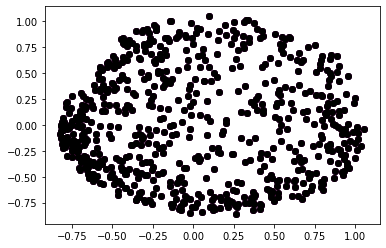

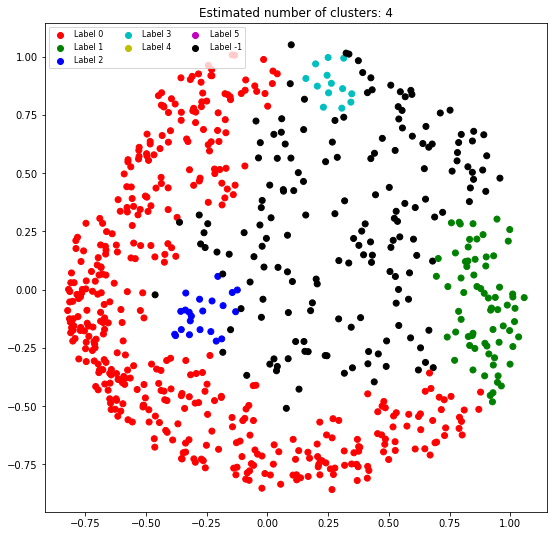

Estimated number of clusters: 4
Estimated number of noise points: 170


In [ ]:
# Construyendo los labels para el mapeo de color
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

# Construyendo el vector de color para cada punto de datos
cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

# construcción de la leyenda
r = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])
  
# ploteo de P1 en el eje X y P2 en el eje Y según el vector de color definido
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  
# construyendo leyenda
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4', 
            'Label 5', 'Label -1'), 
           scatterpoints = 1, 
           loc ='upper left', 
           ncol = 3, 
           fontsize = 8)  
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show() 
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_) 

# K means


In [ ]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [ ]:
cust_df = pd.read_csv("Cust_Segmentation_IBM.csv")

In [ ]:
cust_df.shape

(850, 10)

In [ ]:
df = cust_df.drop('Address', axis=1)
#normalizamos
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [ ]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
labels = k_means.labels_
print(labels)

[0 2 0 0 1 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 2 2 2 0 0 2 0 2 0 0 0 0 0 0
 0 0 2 0 2 0 1 0 2 0 0 0 2 2 0 0 2 2 0 0 0 2 0 2 0 2 2 0 0 2 0 0 0 2 2 2 0
 0 0 0 0 2 0 2 2 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 0 0 2 0 0 2 0 2 0 0 2 1 0 2 0 0 0 0 0 0 1 2 0 0 0 0 2 0 0 2 2 0 2 0 2
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 0 2 2 0 0 0 0 0 0
 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 2 0
 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 2 0 0 0 1 0 0 0 2 0 2 2 2 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1
 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0 1 0 0 0 0 2 0 2 2 2 0 0 2 2 0 0 0 0 0 0
 0 2 0 0 0 0 2 0 0 0 2 0 

In [ ]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [ ]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.468413,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,0.285185,10.094761
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,402.295082,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,0.171233,10.724590


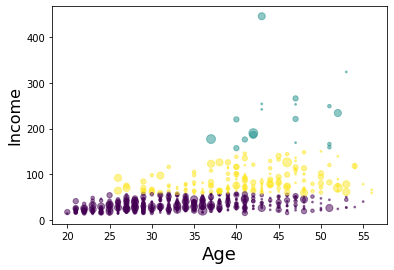

In [ ]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

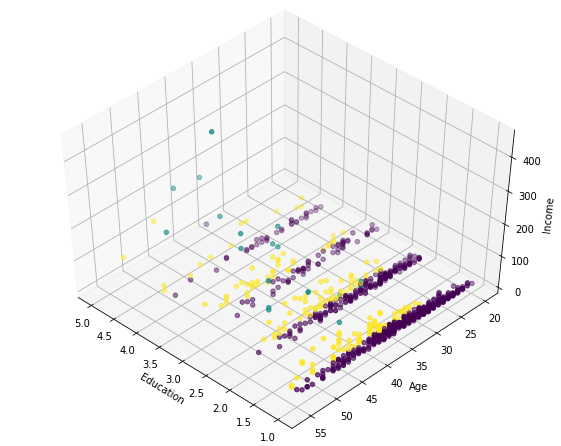

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

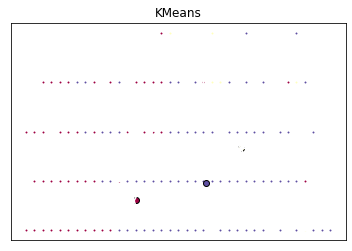

In [ ]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

# REDES NEURONALES

In [ ]:
import pandas as pd
import numpy as np
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [ ]:
df.drop('Customer Id' ,axis=1, inplace=True)

In [ ]:
X = df.copy()

In [ ]:
#separate target from predictors
y = X.Clus_km
X.drop(['Clus_km'], axis=1, inplace=True)

In [ ]:
y[:10]

0    0
1    2
2    0
3    0
4    1
5    2
6    0
7    2
8    0
9    2
Name: Clus_km, dtype: int32

In [ ]:
from keras.utils import np_utils
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [ ]:
# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, dummy_y, train_size=0.8, random_state=1)

In [ ]:
X.dtypes

Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [ ]:
X_valid_full.isnull().sum()

Age                 0
Edu                 0
Years Employed      0
Income              0
Card Debt           0
Other Debt          0
Defaulted          34
DebtIncomeRatio     0
dtype: int64

In [ ]:
X_train_full['Defaulted'].fillna(0, inplace=True)
X_valid_full['Defaulted'].fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#normalizando los datos y automaticamente pasado de pandas a array para implementacion de modelos de ML
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_full)
X_train = scaler.transform(X_train_full)
X_valid = scaler.transform(X_valid_full)

In [ ]:
X_train.shape

(680, 8)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,), kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200, batch_size=5)

# evaluate the keras model
_, accuracy = model.evaluate(X_valid, y_valid)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/200
136/136 [==============================] - 0s 815us/step - loss: 1.1019 - accuracy: 0.4206
Epoch 2/200
136/136 [==============================] - 0s 856us/step - loss: 0.7273 - accuracy: 0.7206
Epoch 3/200
136/136 [==============================] - 0s 860us/step - loss: 0.5288 - accuracy: 0.7632
Epoch 4/200
136/136 [==============================] - 0s 813us/step - loss: 0.4481 - accuracy: 0.7632
Epoch 5/200
136/136 [==============================] - 0s 878us/step - loss: 0.4002 - accuracy: 0.7632
Epoch 6/200
136/136 [==============================] - 0s 777us/step - loss: 0.3636 - accuracy: 0.7632
Epoch 7/200
136/136 [==============================] - 0s 795us/step - loss: 0.3356 - accuracy: 0.8691
Epoch 8/200
136/136 [==============================] - 0s 807us/step - loss: 0.3115 - accuracy: 0.9132
Epoch 9/200
136/136 [==============================] - 0s 840us/step - loss: 0.2899 - accuracy: 0.9147
Epoch 10/200
136/136 [==============================] - 0s 811us/step - l

In [ ]:
model.save("green.h5")

In [ ]:
import joblib
joblib.dump(scaler,'green.pkl')

['green.pkl']